In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")


In [8]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=10000),
        'params': {
            'model__C': [0.1, 1],
            'model__solver': ['liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [10, 20]
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True),
        'params': {
            'model__C': [1],
            'model__kernel': ['rbf']
        }
    }
}


🔍 Running: Logistic Regression


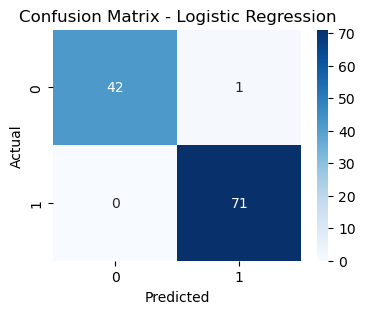

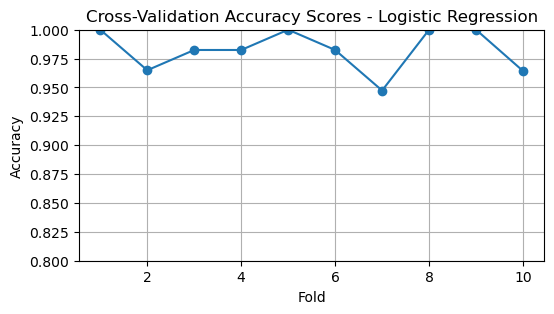

🔍 Running: Random Forest


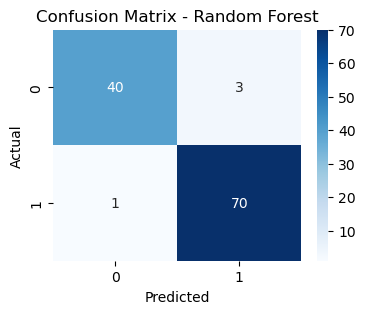

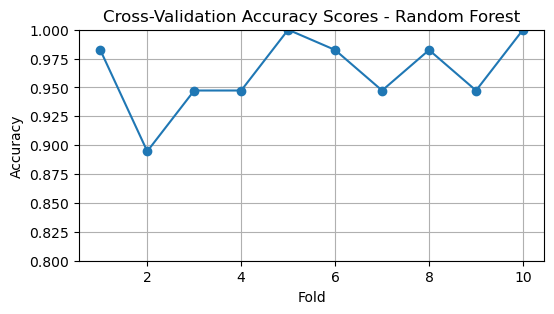

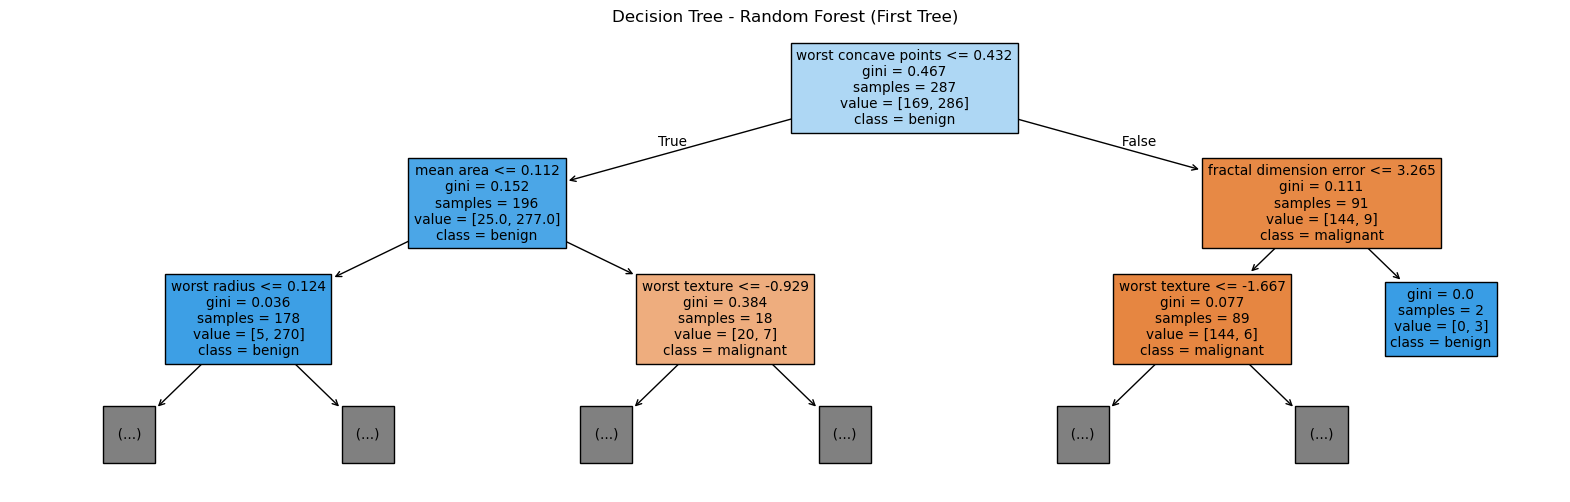

🔍 Running: Support Vector Machine


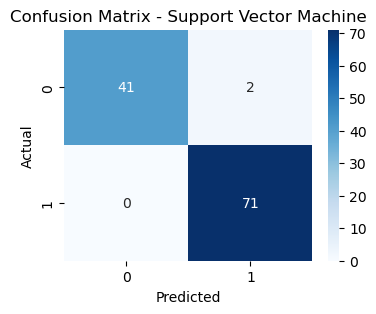

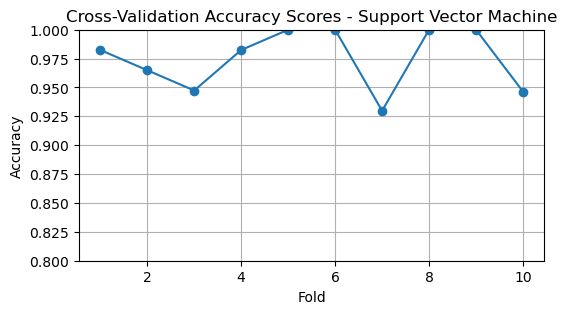

In [20]:
results = []

for model_name, mp in models.items():
    print(f"🔍 Running: {model_name}")
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])
    
    clf = GridSearchCV(pipe, mp['params'], cv=5, scoring='f1')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    
    # Confusion Matrix Plot
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Cross Validation Scores (Accuracy)
    cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=10, scoring='accuracy')
    
    plt.figure(figsize=(6,3))
    plt.plot(range(1, 11), cv_scores, marker='o')
    plt.title(f"Cross-Validation Accuracy Scores - {model_name}")
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.ylim(0.8, 1)
    plt.grid(True)
    plt.show()
    
    # Decision Tree Plot (Only for Random Forest)
    if model_name == "Random Forest":
        best_rf = clf.best_estimator_.named_steps['model']
        plt.figure(figsize=(20, 6))
        plot_tree(best_rf.estimators_[0], feature_names=X.columns, class_names=data.target_names, filled=True, max_depth=2)
        plt.title("Decision Tree - Random Forest (First Tree)")
        plt.show()
    
    results.append({
        'Model': model_name,
        'Best Params': clf.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


In [17]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Best Params,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,"{'model__C': 1, 'model__kernel': 'rbf'}",0.982456,0.972603,1.0,0.986111
1,Support Vector Machine,"{'model__C': 1, 'model__kernel': 'rbf'}",0.982456,0.972603,1.0,0.986111


In [11]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'model__C': 0.1, 'model__solver': 'liblinear'}",0.991228,0.986111,1.000000,0.993007
1,Support Vector Machine,"{'model__C': 1, 'model__kernel': 'rbf'}",0.982456,0.972603,1.000000,0.986111
2,Random Forest,"{'model__max_depth': 10, 'model__n_estimators'...",0.964912,0.958904,0.985915,0.972222
